In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
with open('../data/bodies_data.pkl', 'rb') as f:
    bodies = pkl.load(f)
with open('../data/markers_data.pkl', 'rb') as f:
    markers = pkl.load(f)

In [3]:
bodies_df = pd.DataFrame(bodies, columns = ['t', 'id', 'x', 'y', 'z', 'x_q', 'y_q', 'z_q', 'w_q'])
markers_df = pd.DataFrame(markers, columns = ['t', 'm_id', 'm_x', 'm_y', 'm_z'])

### Transform between rigid_body and single_marker
Cannot merge dataframes as float time are not comparable.
Instead: just do transforms manually

In [4]:
#drop duplicates
bodies_df = bodies_df.drop_duplicates(subset = ['x','y','z','x_q','y_q','z_q','w_q'], keep = 'first')
markers_df = markers_df.drop_duplicates(subset = ['m_x', 'm_y', 'm_z'], keep = 'first')
# markers_df.head()
# bodies_df.head()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


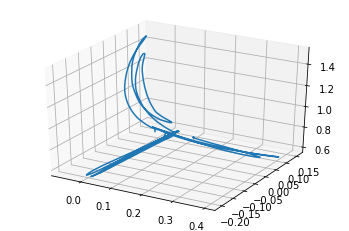

In [5]:
# relationship between rigid_body and single_marker
# same x, y (height), but different z (z-= 0.07)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_coords = bodies_df['x']
z_coords = -bodies_df['y']
y_coords = bodies_df['z'] - 0.07


ax.plot(x_coords, y_coords, z_coords)

